In [5]:
import numpy as np
import pandas as pd
import scipy.io.matlab as mat

In [ ]:
phys_mat = mat.loadmat('s2s_mitbih_aami.mat')

In [4]:
#keys = phys_mat.keys()
keys
phys_mat['__header__']
phys_mat['__version__']
phys_mat['__globals__']
phys = phys_mat['s2s_mitbih']
type(phys)
phys[0]

NameError: name 'keys' is not defined

In [ ]:
# sjs_phys = []
# for
p = phys[0]
type(p)
p[47]
;

In [ ]:
p[47]
type(p)
;

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(p[47])


In [ ]:
plt.plot(p[47][1])
plt.show()

In [ ]:
p[30][1]


In [ ]:

def tesst(): pass

In [6]:
import pandas as pd

df = pd.read_csv('ecg_kaggle/mitbih_train.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


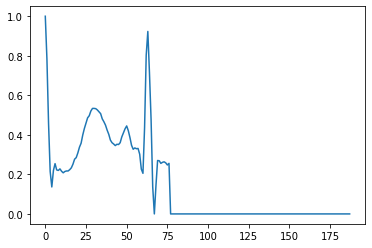

In [9]:
import matplotlib.pyplot as plt
#
df.iloc[100,:].plot()

In [11]:
np.prod(df.shape)
df.shape

(87554, 188)

In [22]:
df_187 = df.iloc[:,187]
df_187.unique()

array([0., 1., 2., 3., 4.])

In [19]:
df_186 = df.iloc[:,186]
df_186.unique()
;

''

In [26]:
y, X = df.iloc[:,-1].astype(int), df.iloc[:,:-1]
labels = y.unique()
labels

array([0, 1, 2, 3, 4])

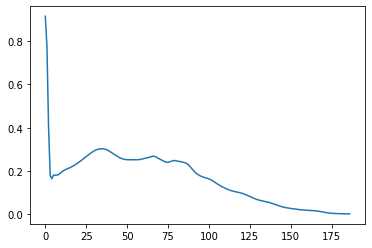

In [28]:
plt.plot(X[y==0].mean())

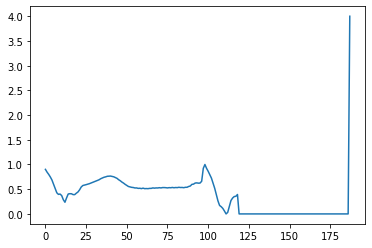

In [24]:
plt.plot(X[y==1].mean())


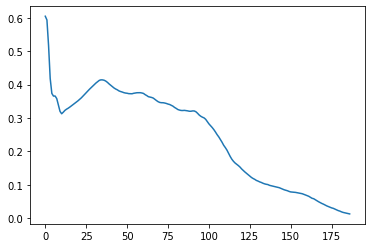

In [29]:
plt.plot(X[y==2].mean())

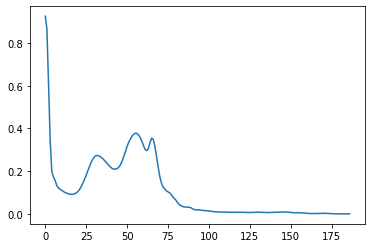

In [30]:
plt.plot(X[y==3].mean())

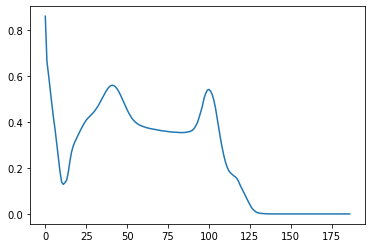

In [31]:
plt.plot(X[y==4].mean())

In [35]:
from collections import Counter
c = Counter(y).most_common(5)

for c_ in enumerate(c):
    print(c_)

(0, (0, 72471))
(1, (4, 6431))
(2, (2, 5788))
(3, (1, 2223))
(4, (3, 641))


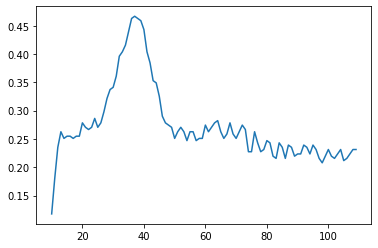

In [43]:
plt.plot( X.iloc[5000,10:110])

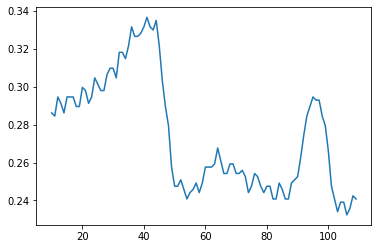

In [44]:
plt.plot( X.iloc[50000,10:110])

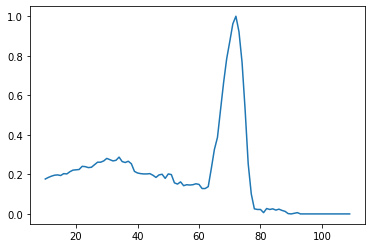

In [45]:
plt.plot( X.iloc[60000,10:110])



In [ ]:
C0 = np.argwhere(y.values == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()



In [51]:
np.argwhere(y.values == 0).shape

(72471, 1)

In [52]:
np.argwhere(y.values == 1).shape


(2223, 1)

In [58]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=0)

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1, oob_score = True)
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)



C:\software\anaconda3\lib\site-packages\imblearn\ensemble\_forest.py:591: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [62]:
#classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred,     target_names=['N','A1','A2','A3','UC']))

0.855654795897389